In [9]:
import mga
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def function_one(agent):
    return 2 + (agent[0] - 2) ** 2 + (agent[1] - 1) ** 2


def function_two(agent):
    return 9 * agent[0] - (agent[1] - 1) ** 2

def constraint_one(agent):
    if (agent[0]**2 + agent[1]**2) <= 225:
        return 0
    else:
        return 1

def constraint_two(agent):
    if (agent[0] - 3*agent[1] + 10) <= 0:
        return 0
    else:
        return 1

In [21]:
fitness_functions = [function_one, function_two]
constraint_functions = [constraint_one, constraint_two]
random_restarts = 500
MGA = mga.MicroGeneticAlgorithm(
    fitness_functions,
    constraint_functions,
    num_variables=2,
    population_size=50,
    agents_to_keep=2,
    agents_to_shuffle=0,
    random_restarts=random_restarts,
    max_iterations=50,
    num_bits=64,
    random_seed=42,
)
MGA.run_iterations()

Random restart: 0 starting, best fitness is -57.933768558272405             and best agent is [-8.97550645 11.4850641 ]
[0.37454012 0.62545988]
Random restart: 1 starting, best fitness is -287.7002224081477             and best agent is [-9.9039314   6.27260924]
[0.11921044 0.88078956]
Random restart: 2 starting, best fitness is 212.70506555383153             and best agent is [-13.03263248   3.6092479 ]
[0.93846821 0.06153179]
Random restart: 3 starting, best fitness is 88.96222845727813             and best agent is [-13.03263248   3.6092479 ]
[0.59367507 0.40632493]
Random restart: 4 starting, best fitness is 135.86472330644227             and best agent is [-13.03263248   3.6092479 ]
[0.72436271 0.27563729]
Random restart: 5 starting, best fitness is -376.36965935359063             and best agent is [-3.67232873  6.17679342]
[0.10375018 0.89624982]
Random restart: 6 starting, best fitness is -115.83676555287181             and best agent is [-1.96794879 14.0549614 ]
[0.29997218 0.7

In [17]:
f1 = np.zeros((random_restarts))
f2 = np.zeros((random_restarts))
for i in range(len(MGA.best_agents)):
    f1[i] = function_one(MGA.best_agents[i])
    f2[i] = function_two(MGA.best_agents[i])

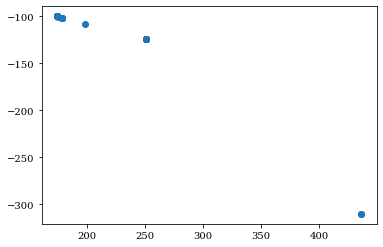

In [18]:
plt.scatter(f1,f2)

In [14]:
import benchmark_chankong_haimes as bm
from pymoo.optimize import minimize
from pymoo.core.problem import ElementwiseProblem
from pymoo.visualization.scatter import Scatter

# Predefined Problems, Algorithms and Terminations
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.util.termination.default import MultiObjectiveDefaultTermination

n_gen |  n_eval |   cv (min)   |   cv (avg)   |  n_nds  |     eps      |  indicator  
    1 |     100 |  0.00000E+00 |  2.175589973 |       9 |            - |            -
    2 |     200 |  0.00000E+00 |  0.154700553 |      15 |  0.022606580 |        ideal
    3 |     300 |  0.00000E+00 |  0.00000E+00 |      31 |  0.004910784 |        ideal
    4 |     400 |  0.00000E+00 |  0.00000E+00 |      39 |  0.002983203 |        nadir
    5 |     500 |  0.00000E+00 |  0.00000E+00 |      61 |  0.010176867 |            f
    6 |     600 |  0.00000E+00 |  0.00000E+00 |      94 |  0.100545200 |        ideal
    7 |     700 |  0.00000E+00 |  0.00000E+00 |     100 |  0.032386585 |        nadir
    8 |     800 |  0.00000E+00 |  0.00000E+00 |     100 |  0.002606420 |            f
    9 |     900 |  0.00000E+00 |  0.00000E+00 |     100 |  0.011328152 |        ideal
   10 |    1000 |  0.00000E+00 |  0.00000E+00 |     100 |  0.001791952 |            f
   11 |    1100 |  0.00000E+00 |  0.00000E+00 |     10

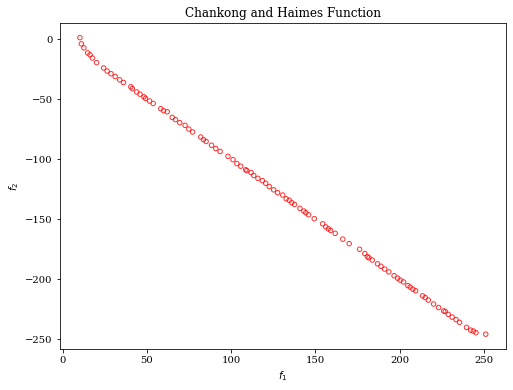

In [15]:
problem = bm.ChankongHaimes()
algorithm = NSGA2()
termination = MultiObjectiveDefaultTermination()
result = minimize(
    problem,
    algorithm,
    termination,
    pf=True,
    seed=1,
    save_history=True,
    verbose=True,
)
plot = Scatter(title="Chankong and Haimes Function")
plot.add(result.F, facecolor="none", edgecolor="red", alpha=0.8, s=20)
plot.show()

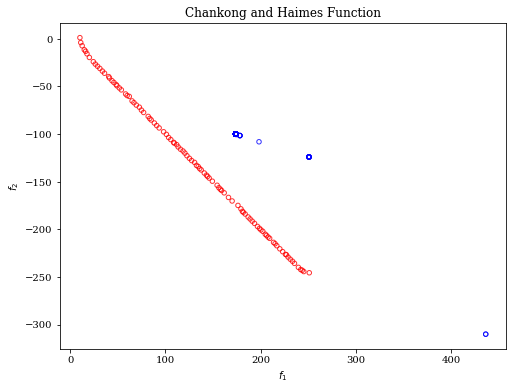

In [16]:
f = np.vstack((f1, f2)).T
#f = f[:100][:]
plot = Scatter(title="Chankong and Haimes Function")
plot.add(result.F, facecolor="none", edgecolor="red", alpha=0.8, s=20)
plot.add(f, facecolor="none", edgecolor="blue", alpha=0.8, s=20)
plot.show()